In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reading data from Seeq

In [2]:
with open('./data.pkl', 'rb') as file:
    data = pickle.load(file)

In [3]:
data_Seeq = {}
for tag in data.keys():
    timestamps = []
    values = []
    for item in data[tag]:
        timestamps.append(item['key'])
        if 'value' in item.keys():
            if type(item['value']) == str:
                values.append(int(item['value'].replace("ENUM{{", "", 1).split("|")[0]))
            else:
                values.append(item['value'])
        else:
            values.append(np.nan)
            print('%s at %s returned no value, fill with nan' %(tag, item['key']))
    data_Seeq[tag] = pd.DataFrame.from_dict({'timestamps': timestamps, 'values': values})

CSHNG-B0-MOV2408 at 2025-01-01T08:01:15Z returned no value, fill with nan
CSHNG-B0-MOV2408 at 2025-01-01T08:01:20Z returned no value, fill with nan
CSHNG-B0-MOV2408 at 2025-01-01T13:59:20Z returned no value, fill with nan
CSHNG-B0-MOV2408 at 2025-01-01T13:59:25Z returned no value, fill with nan
CSHNG-B0-MOV2408 at 2025-01-01T14:27:40Z returned no value, fill with nan
CSHNG-B0-MOV2408 at 2025-01-01T18:26:45Z returned no value, fill with nan
CSHNG-B0-MOV2408 at 2025-01-01T18:26:50Z returned no value, fill with nan
CSHNG-B0-MOV2408 at 2025-01-01T23:33:25Z returned no value, fill with nan
CSHNG-B0-MOV2408 at 2025-01-01T23:33:30Z returned no value, fill with nan
CSHNG-B0-MOV2408 at 2025-01-01T23:33:35Z returned no value, fill with nan
CSHNG-B0-MOV2408 at 2025-01-02T01:37:40Z returned no value, fill with nan
CSHNG-B0-MOV2408 at 2025-01-02T01:37:45Z returned no value, fill with nan
CSHNG-B0-MOV2408 at 2025-01-02T03:06:05Z returned no value, fill with nan
CSHNG-B0-MOV2408 at 2025-01-02T03:06:1

# Reading data from DSS

In [4]:
with open('./data_DSS.pkl', 'rb') as file:
    data_DSS = pickle.load(file)

In [41]:
for key in data_DSS.keys():
    x = data_DSS[key]
    x1 = x[x['Status']!='Good']
    if len(x1.index)!=0:
        print(key)
        print(x1['Value'].unique())

CSHTT-B0-MOV7408
[287.]
CSHNG-B0-MOV2408
[287.]
CSHTT-B0-MOV7410
[287.]
CSHSP-B0-MOV0100
[287.]
CSHSP-B0-RTP-MOVBP
[287.]
CSHSP-B0-RTP-MOVIN
[287.]
CSHSP-B0-RTP-MOVKCK
[287.]
CSHSP-B0-Q
[287.]
CSHTT-B0-MB11-Q
[287.]
CSHTT-B0-MB12-Q
[287.]
CSHTT-B0-QMU11-DEN
[287.]
CSHTT-B0-QMU12-DEN
[287.]
CSHSP-B0-DEN
[287.]
PNLPN-B0-MOV0201
[287.]
BNDLO-A0-DRA-Q
[287.]
BRYAN-B0-DRA-Q
[287.]
CAROP-A0-DRA-Q
[287.]
CRMWL-B0-DRA-Q
[287.]
CRPTR-A0-DRA-Q
[287.]
CSHSP-B0-DRA-Q
[287.]
EDNBG-A0-DRA-Q
[287.]
FTRSM-A0-DRA-Q
[287.]
GRNFL-A0-DRA-Q
[287.]
HRTGT-A0-DRA-Q
[287.]
KENDL-A0-DRA-Q
[287.]
LIBRT-B0-DRA-Q
[287.]
LKSND-A0-DRA-Q
[287.]
LKTLR-B0-DRA-Q
[287.]
LUDDE-A0-DRA-Q
[287.]
LUFKN-B0-DRA-Q
[287.]
LUVER-A0-DRA-Q
[287.]
MDLTP-A0-DRA-Q
[287.]
MNTOR-A0-DRA-Q
[287.]
NAGRA-A0-DRA-Q
[287.]
OYENP-A0-DRA-Q
[287.]
SNTPL-A0-DRA-Q
[287.]
STNTO-A0-DRA-Q
[287.]
STWTV-A0-DRA-Q
[287.]
TINAP-A0-DRA-Q
[287.]
TRNEY-A0-DRA-Q
[287.]
WELWD-A0-DRA-Q
[287.]
WLBER-A0-DRA-Q
[287.]
WNSBR-B0-DRA-Q
[287.]
WTWOD-A0-DRA-Q
[287.]
BNDLO

# Assessing data discrepancies

In [5]:
import numpy as np
rms_error_dict = {}
max_error_dict = {}
for key in data_Seeq.keys():
    try:   
        x1 = data_Seeq[key]['values'].values
        x2 = data_DSS[key]['Value'].values
        rms_error_dict[key] = np.sqrt(np.mean((x1-x2)**2))
        max_error_dict[key] = np.max(np.abs(x1-x2))
    except Exception as e:
        print('Tags not found in both dataset: ', e)

Tags not found in both dataset:  'DVDCT-A0-DRA-Q'
Tags not found in both dataset:  'FREMA-A0-DRA-Q'
Tags not found in both dataset:  'ROSWL-A0-DRA-Q'
Tags not found in both dataset:  'CRNDL-A0-DRA-MOV'
Tags not found in both dataset:  'CSHSP-B0-DRA-MOV'
Tags not found in both dataset:  'CRPTR-A0-DRA-MOV'
Tags not found in both dataset:  'DVDCT-A0-DRA-MOV'
Tags not found in both dataset:  'EDNBG-A0-DRA-MOV'


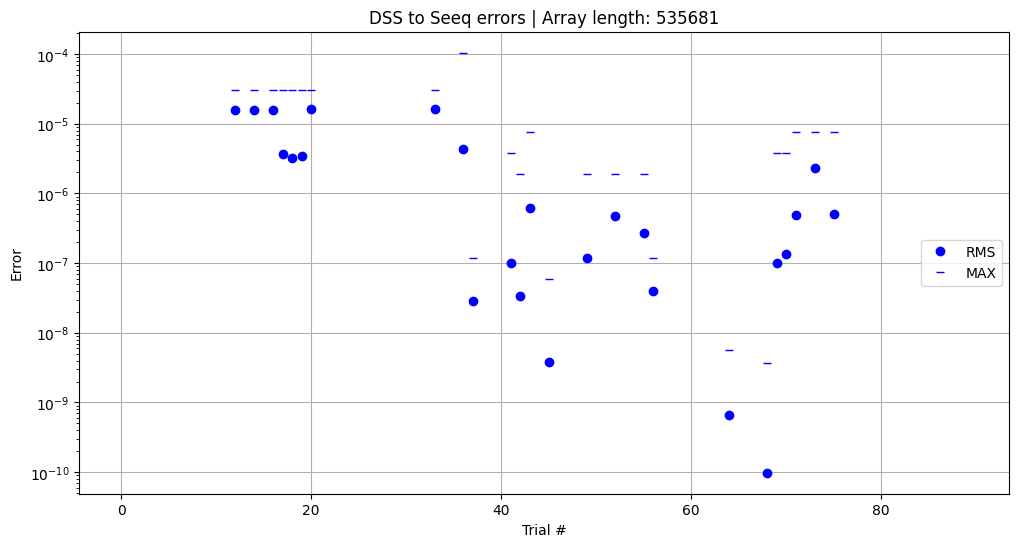

In [6]:
# Create the plot
plt.figure(figsize=(12, 6))  # Set figure size
plt.plot(rms_error_dict.values(),'ob', label='RMS')
plt.plot(max_error_dict.values(),'_b', label='MAX')
plt.xlabel('Trial #')
plt.ylabel('Error')
plt.title('DSS to Seeq errors | Array length: 535681')
plt.grid(True)
plt.yscale('log')
plt.legend(loc='right')

# Show the plot
plt.show()

In [33]:
data_DSS['BRYAN-B0-DRA-Q']['Value'][data_DSS['BRYAN-B0-DRA-Q']['Value']==287]

Timestamp
2025-01-06 06:38:05+00:00    287.0
2025-01-06 06:38:10+00:00    287.0
2025-01-06 06:38:15+00:00    287.0
2025-01-06 06:47:40+00:00    287.0
2025-01-06 06:47:45+00:00    287.0
                             ...  
2025-02-01 02:33:30+00:00    287.0
2025-02-01 02:33:35+00:00    287.0
2025-02-01 02:58:25+00:00    287.0
2025-02-01 02:58:30+00:00    287.0
2025-02-01 02:58:35+00:00    287.0
Name: Value, Length: 1071, dtype: float64

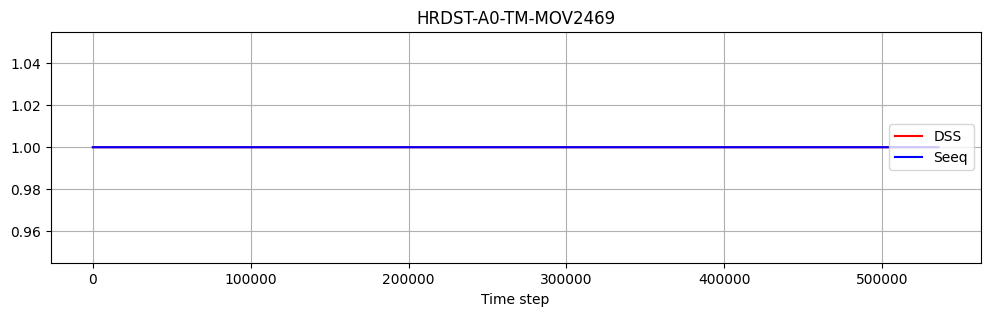

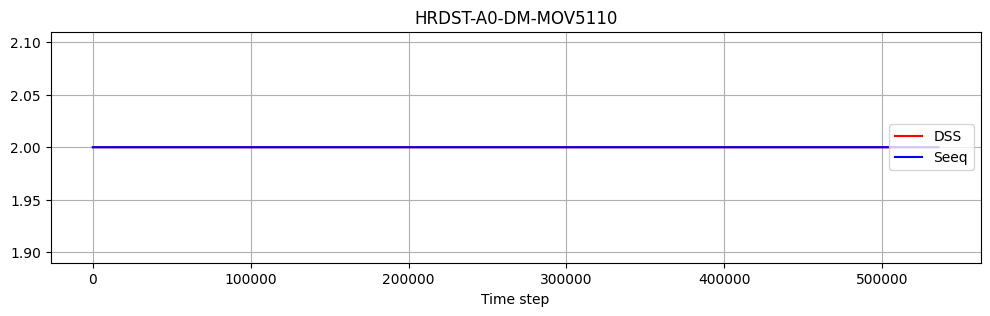

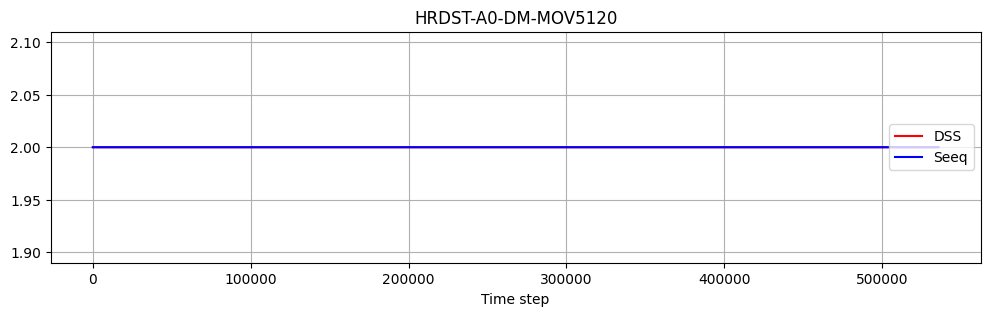

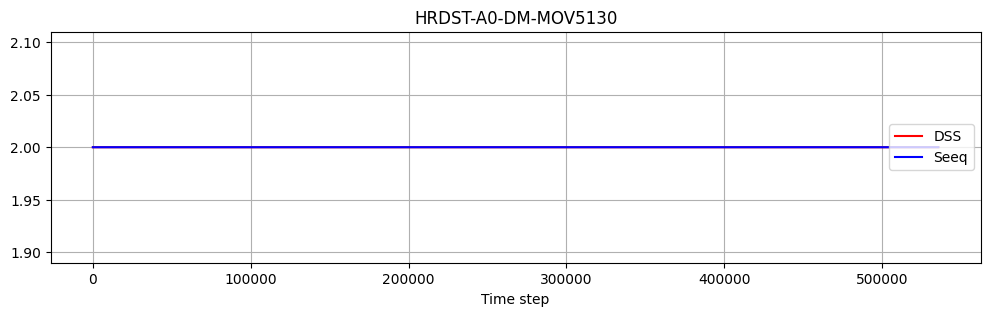

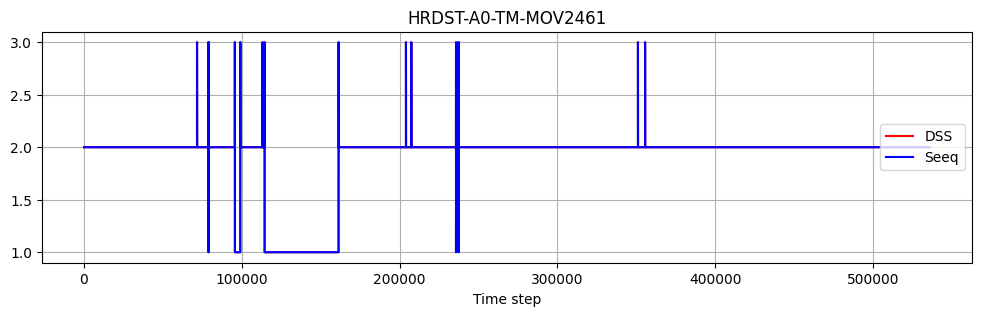

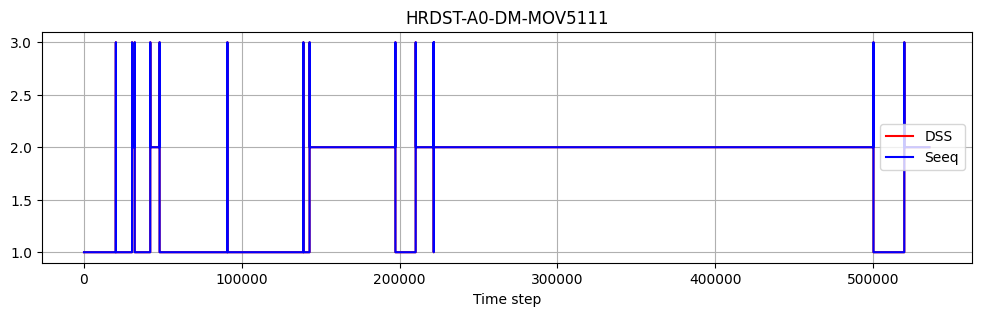

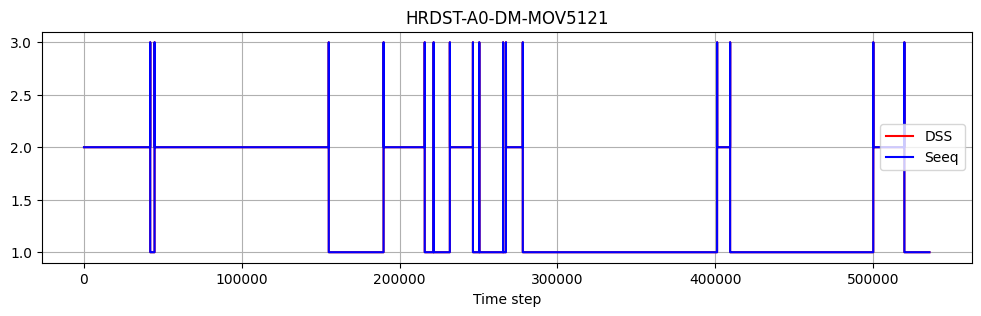

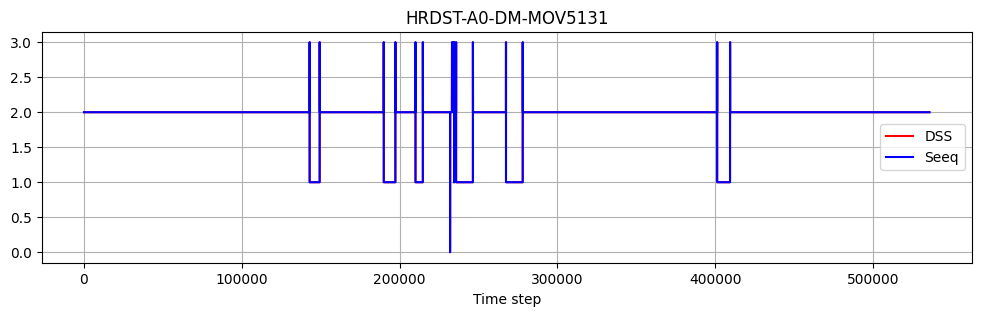

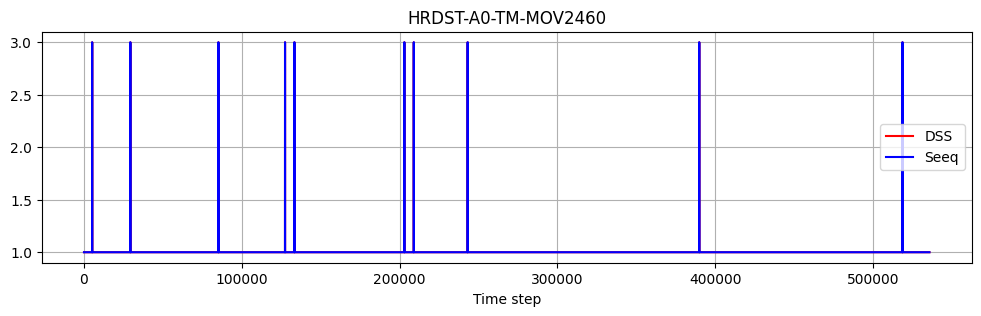

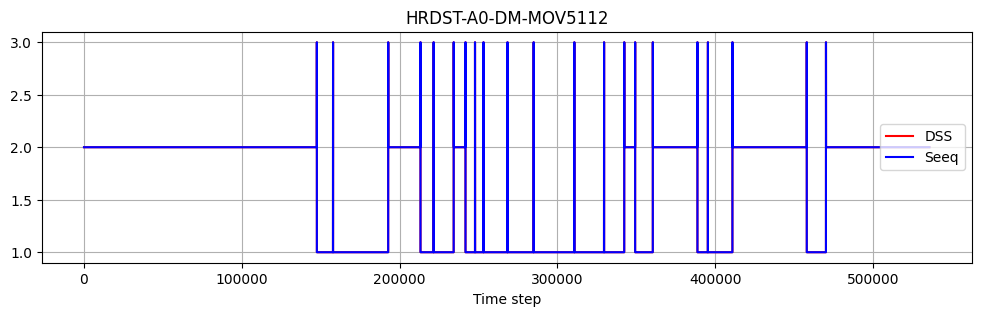

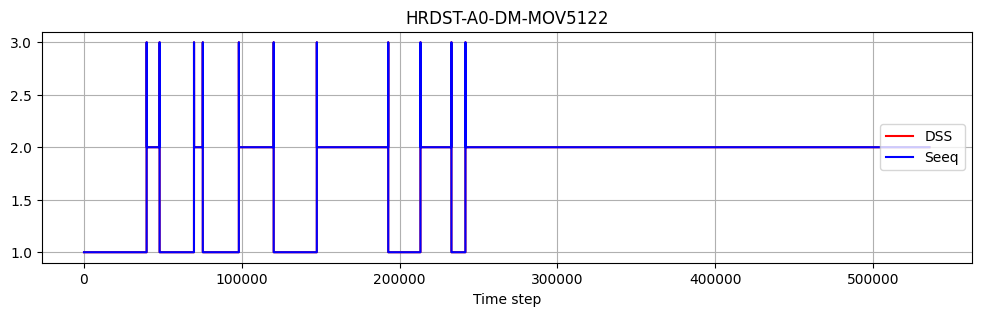

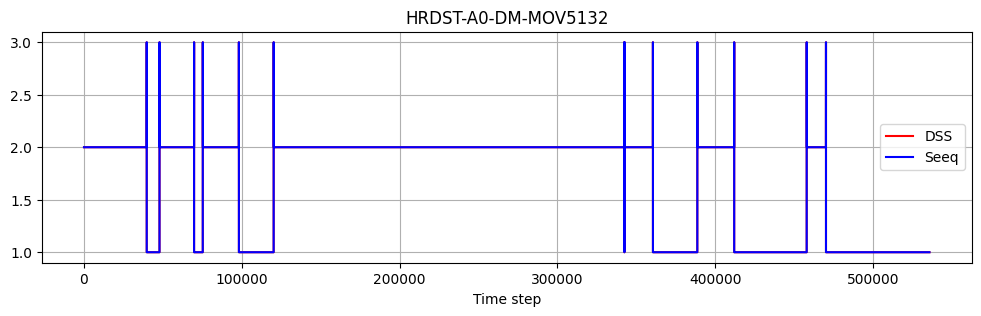

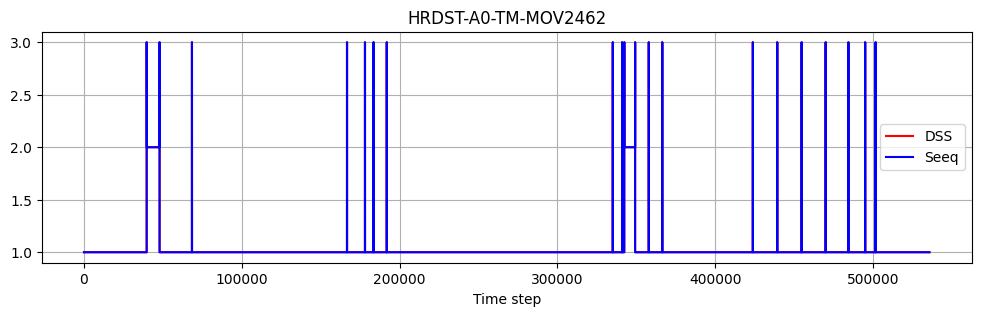

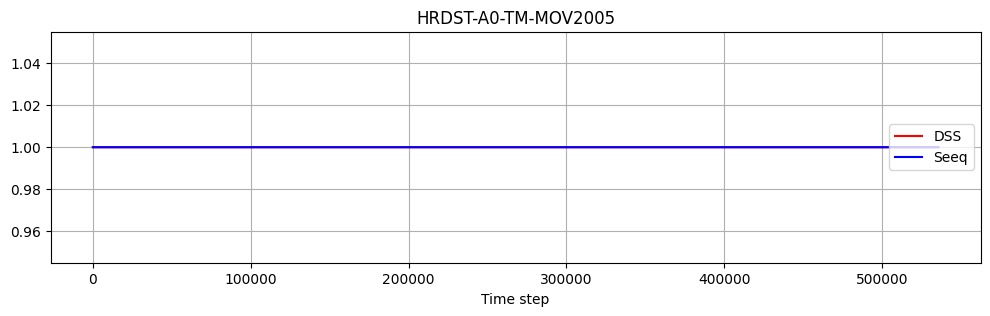

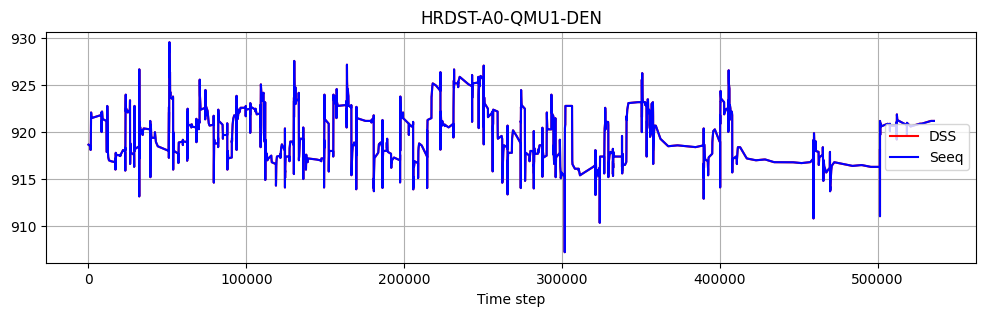

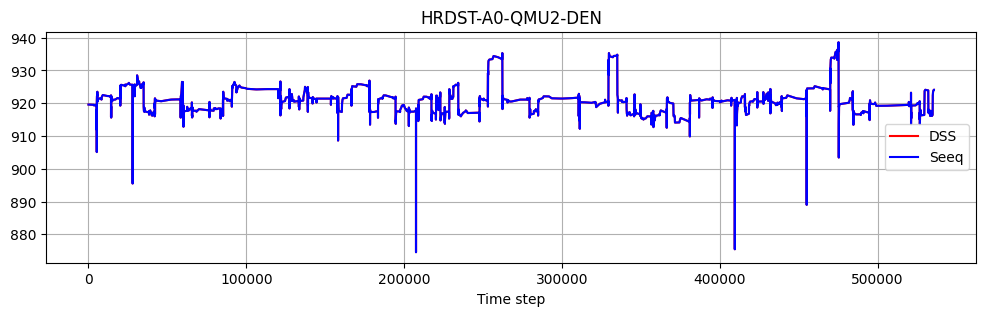

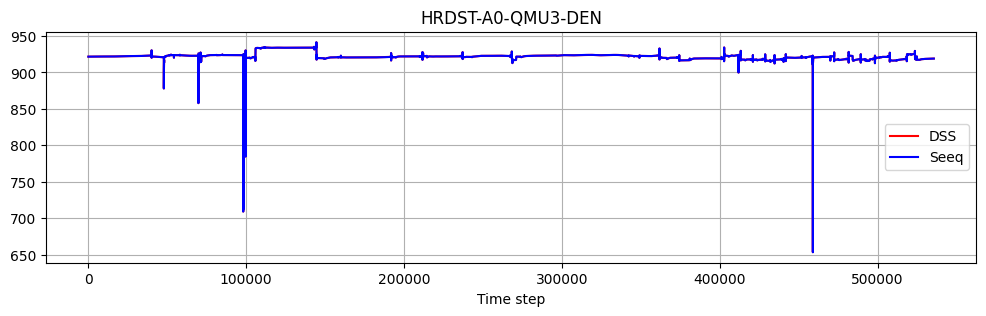

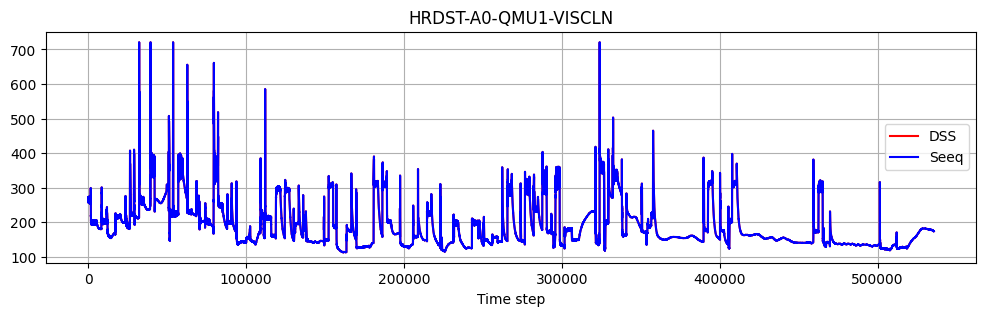

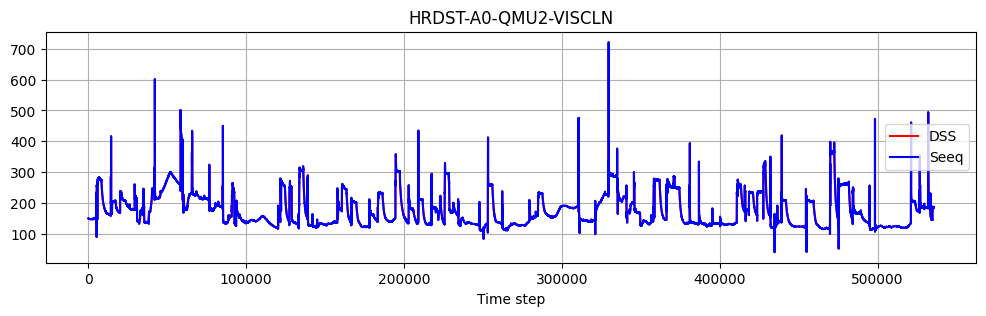

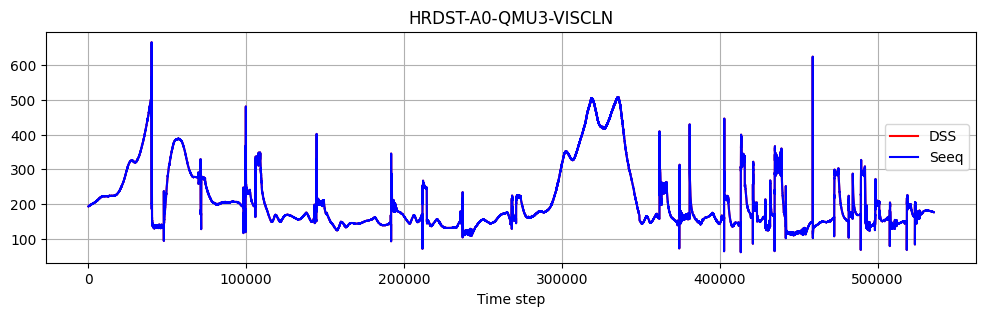

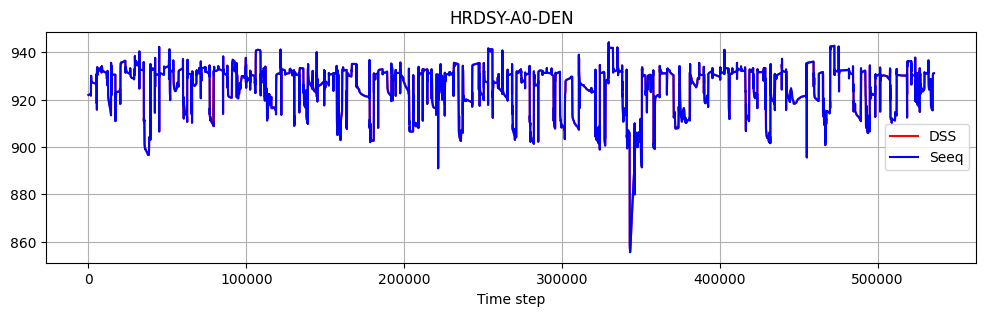

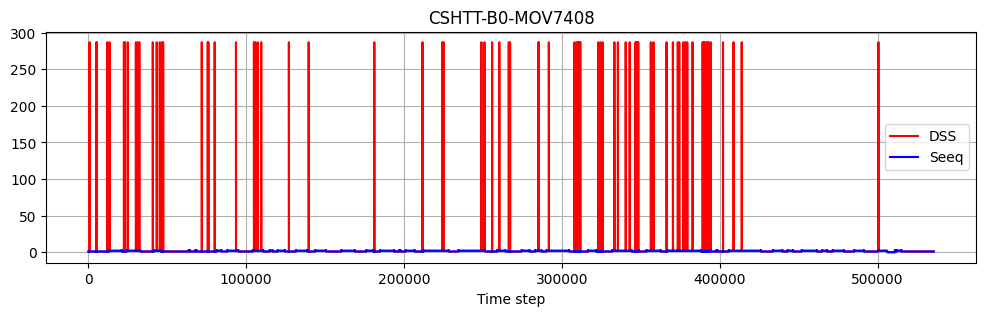

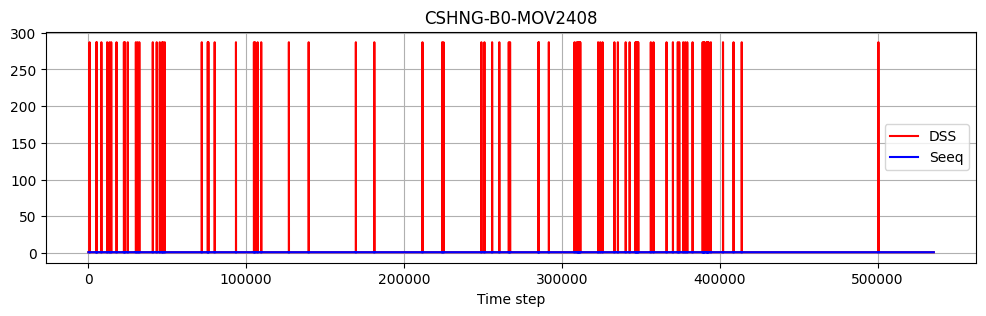

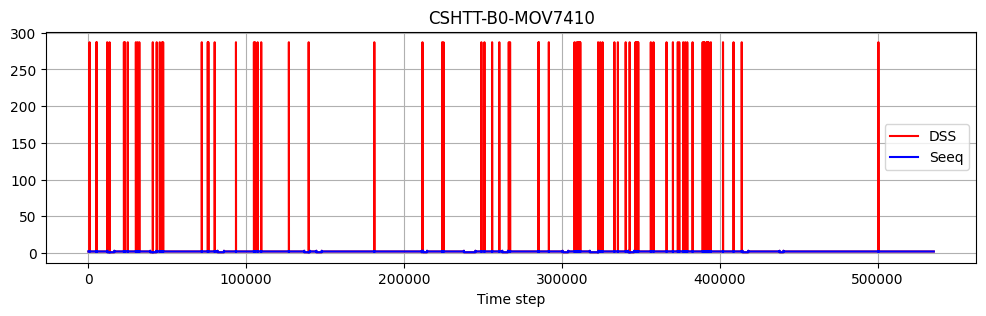

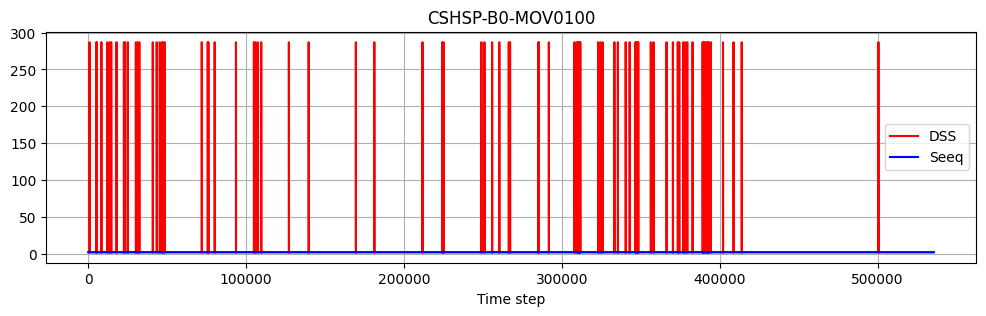

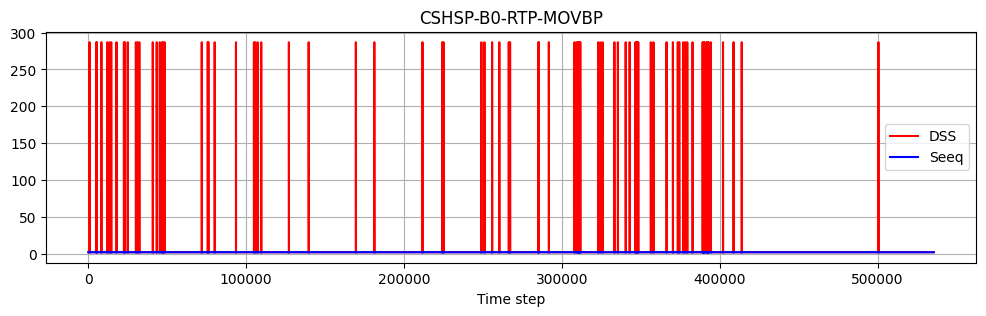

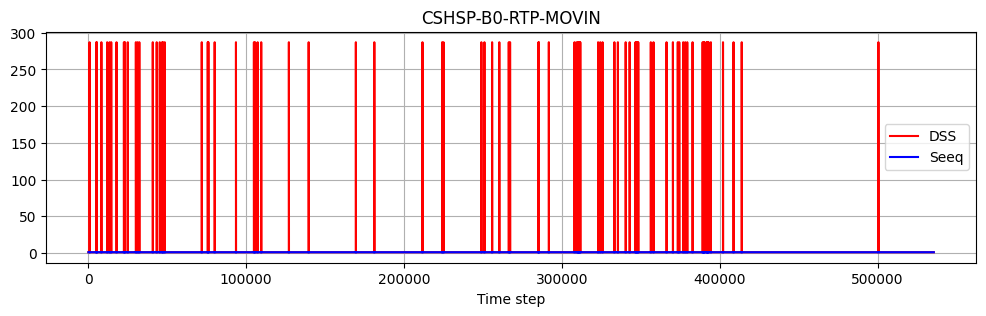

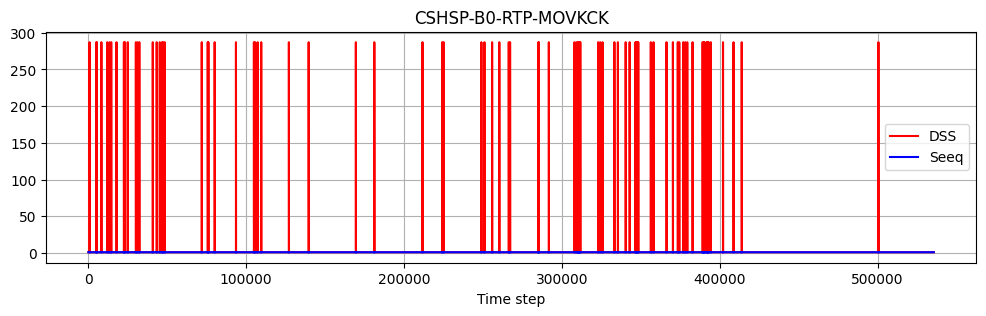

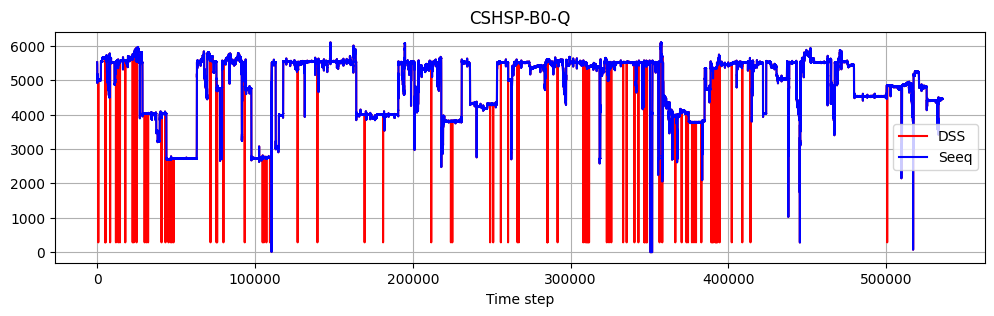

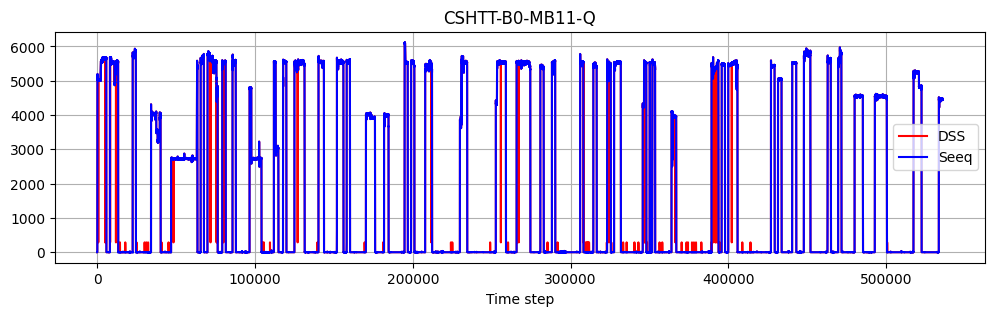

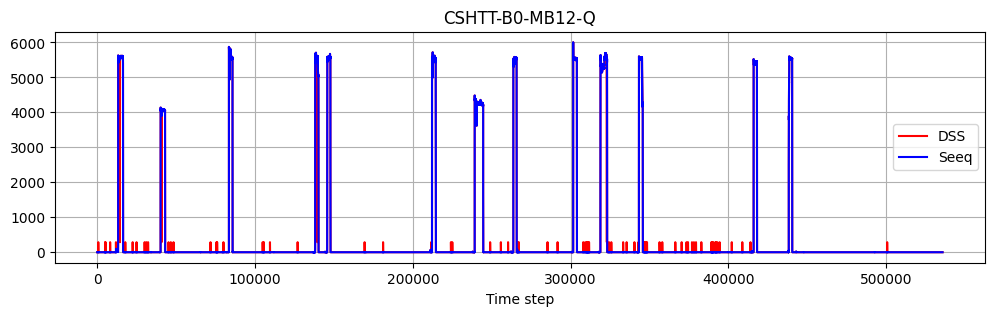

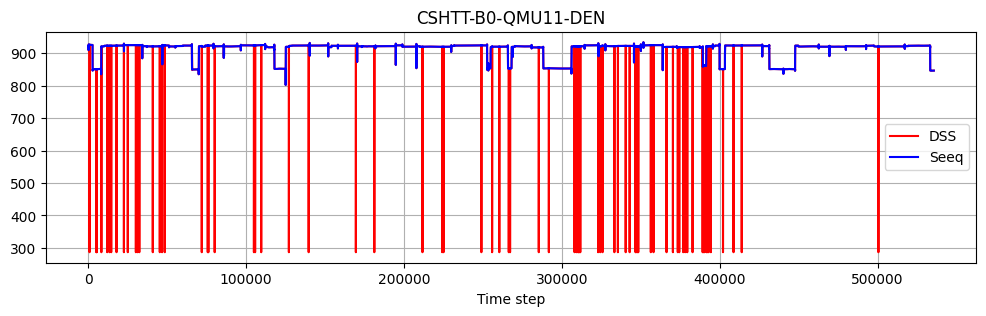

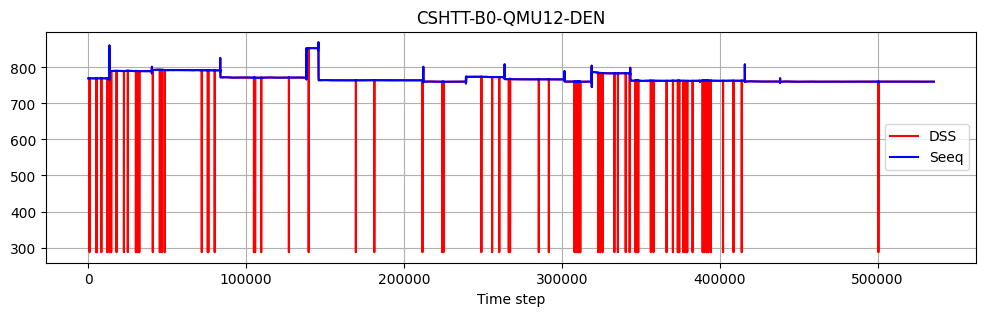

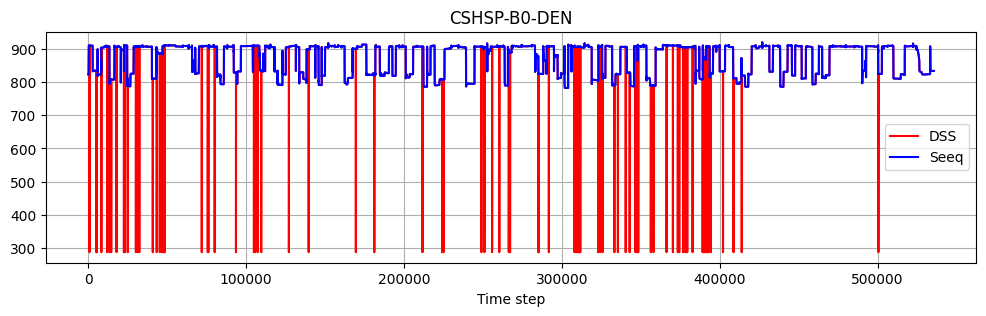

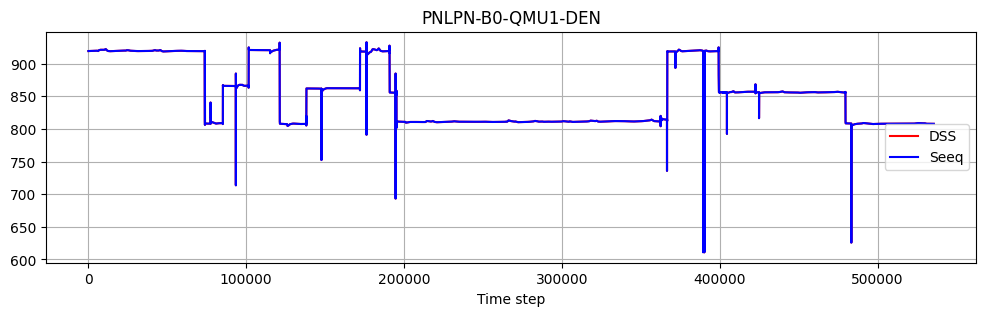

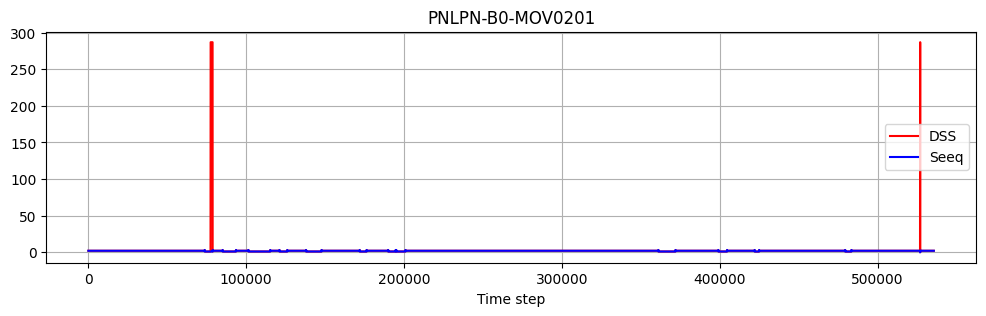

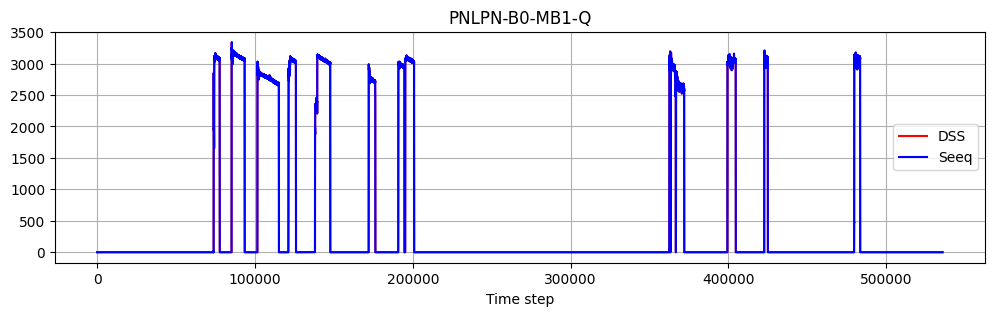

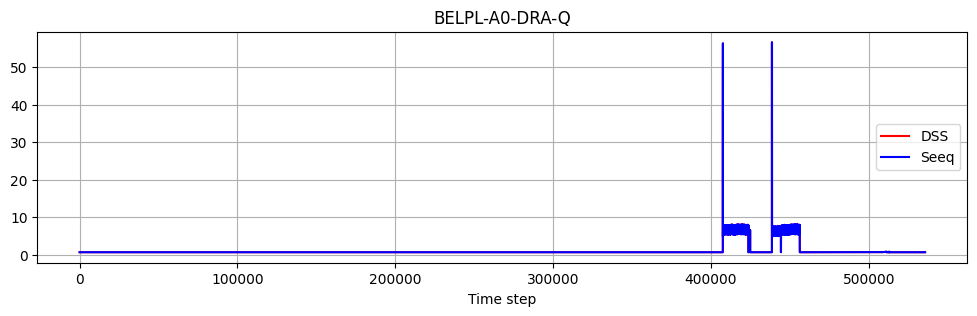

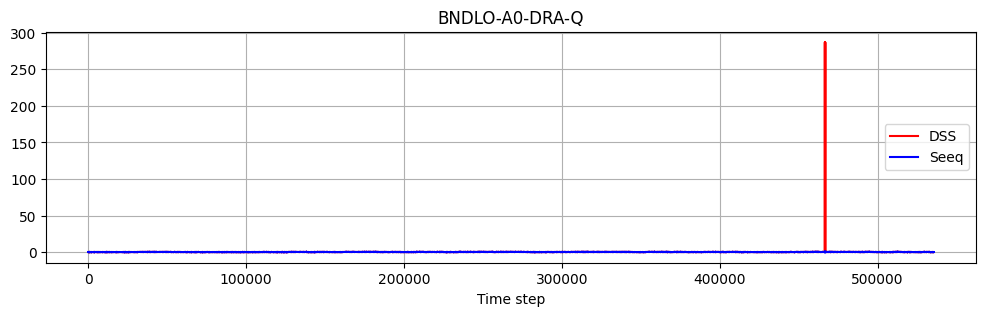

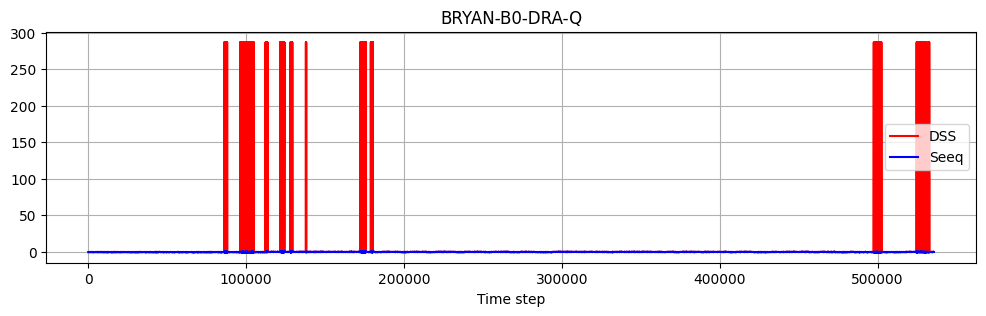

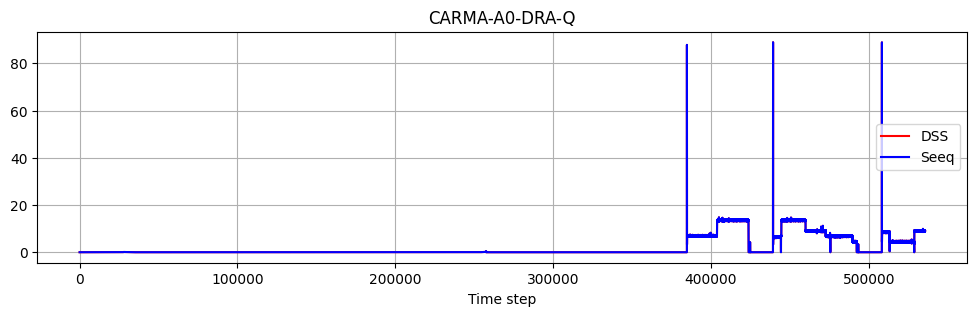

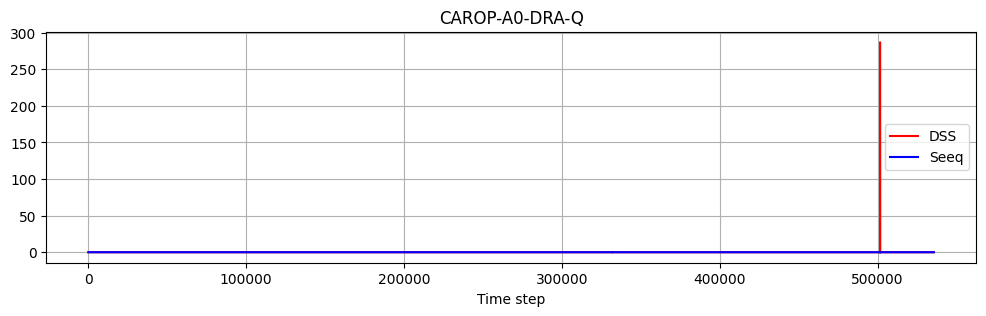

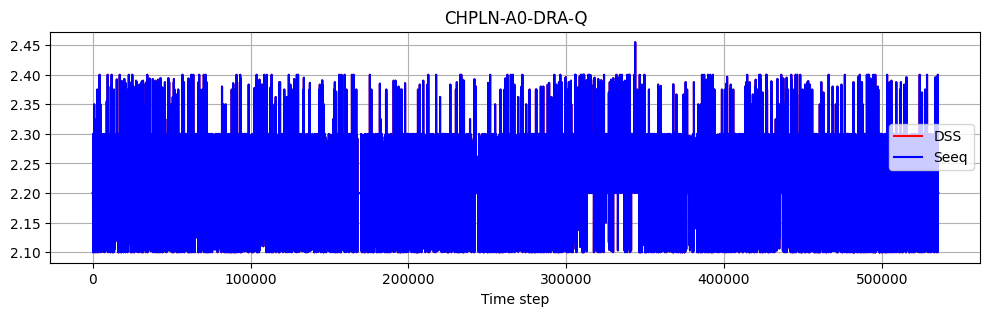

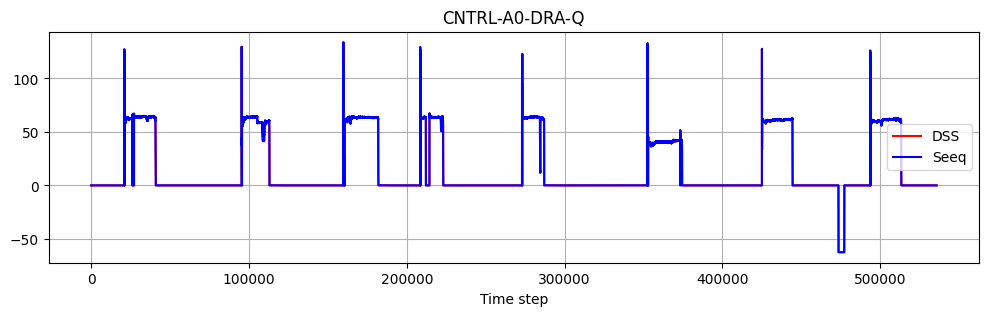

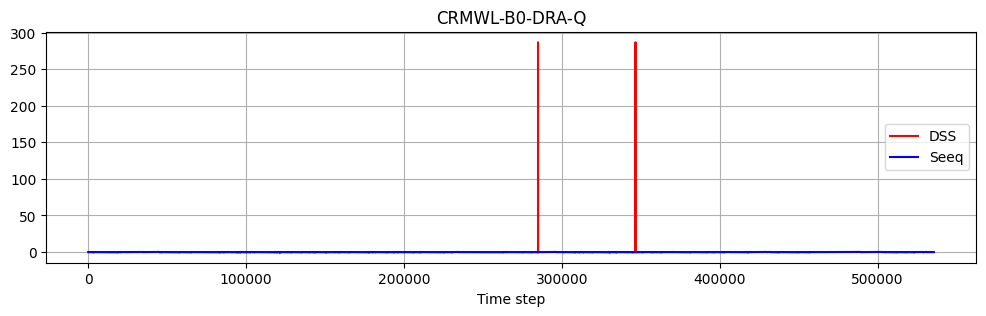

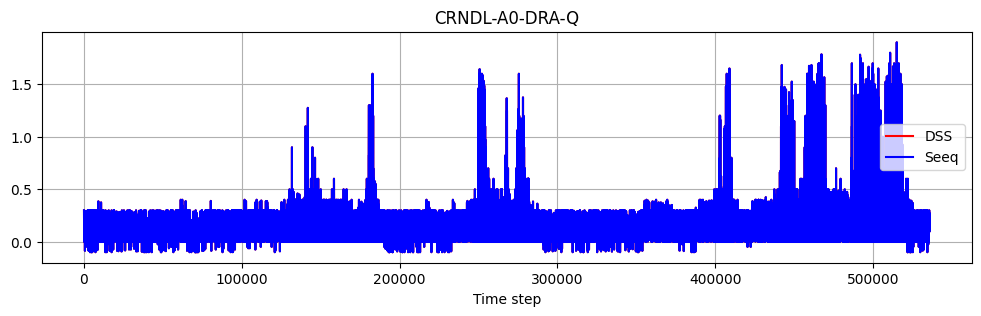

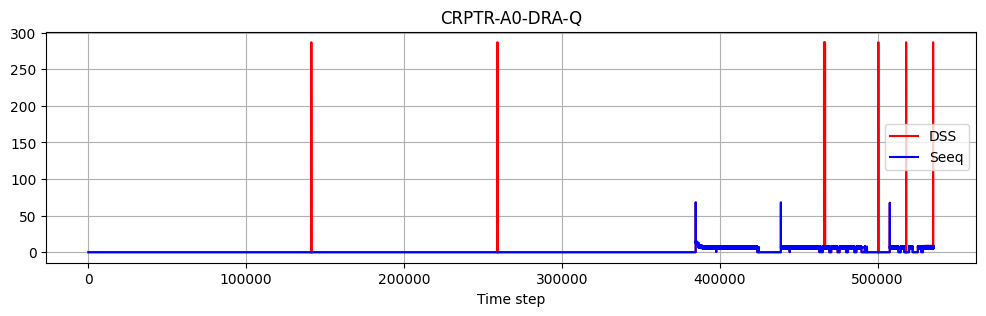

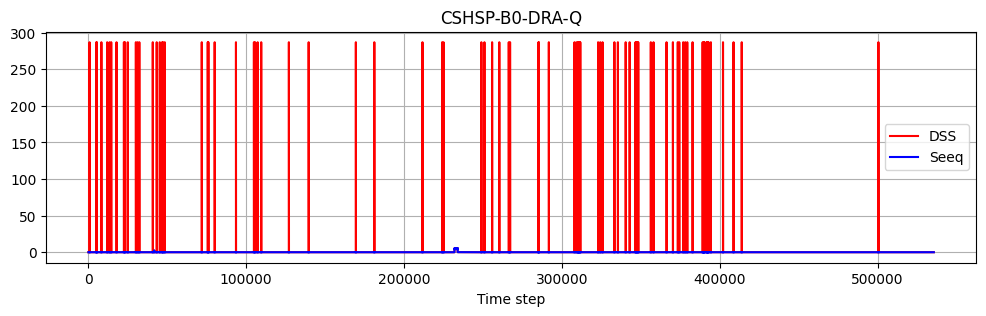

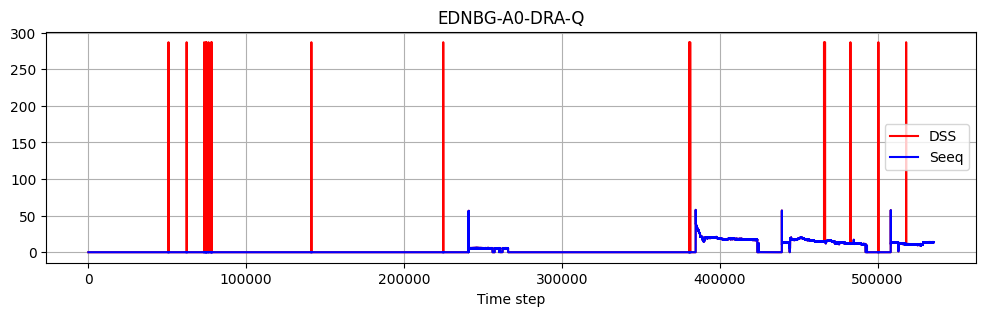

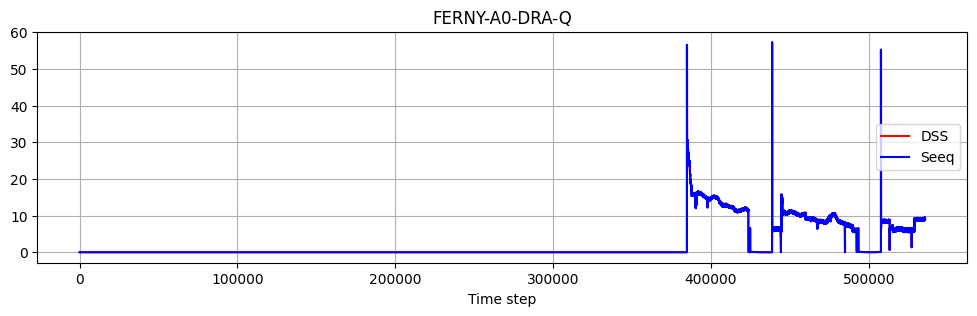

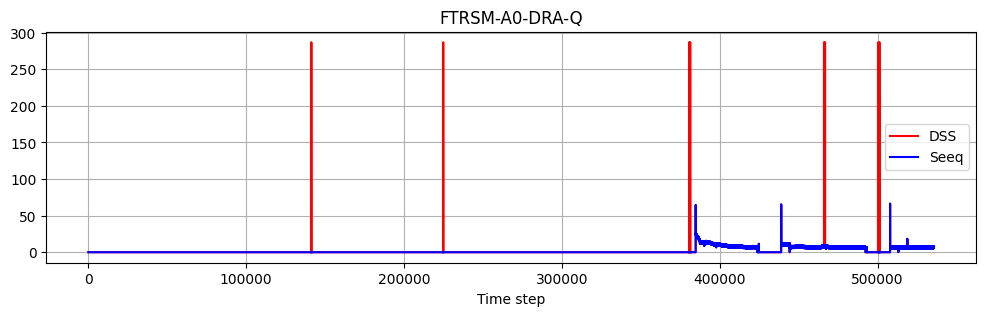

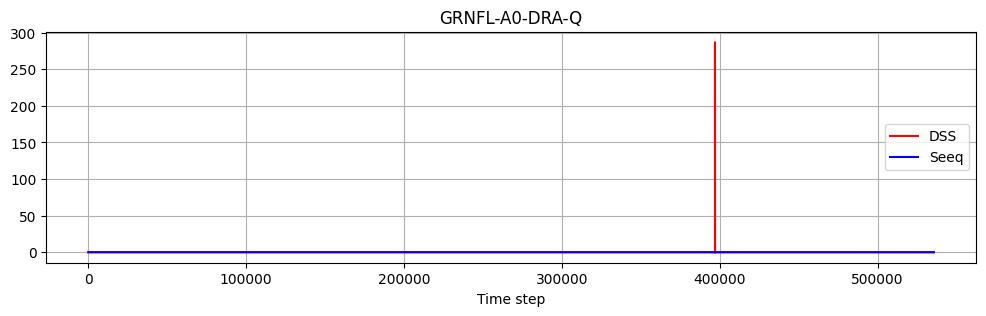

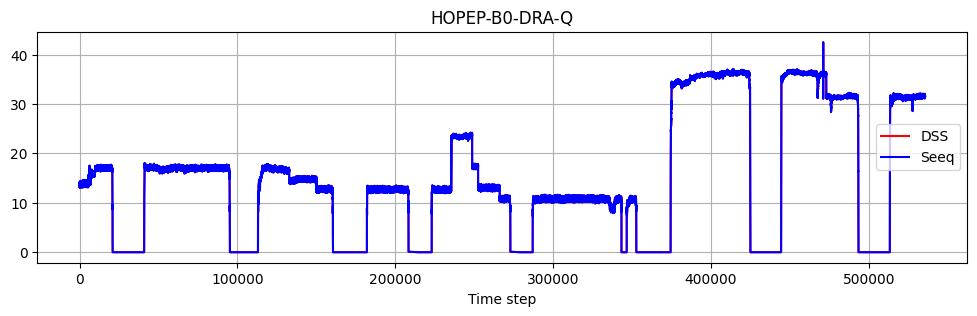

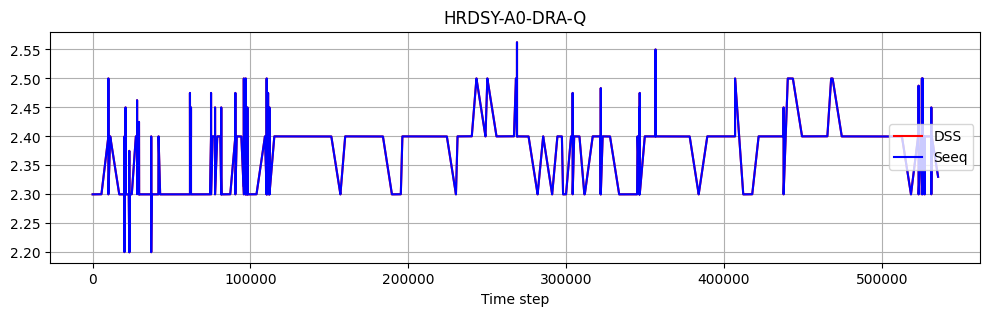

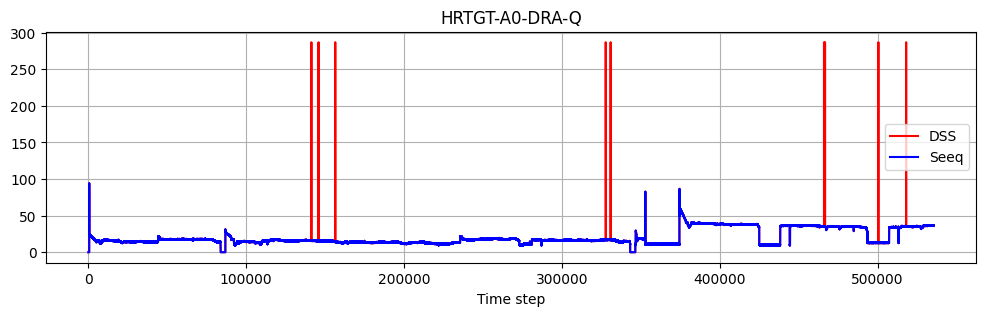

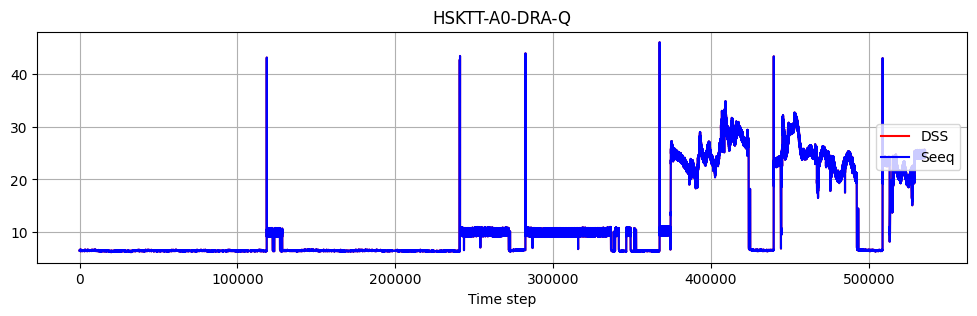

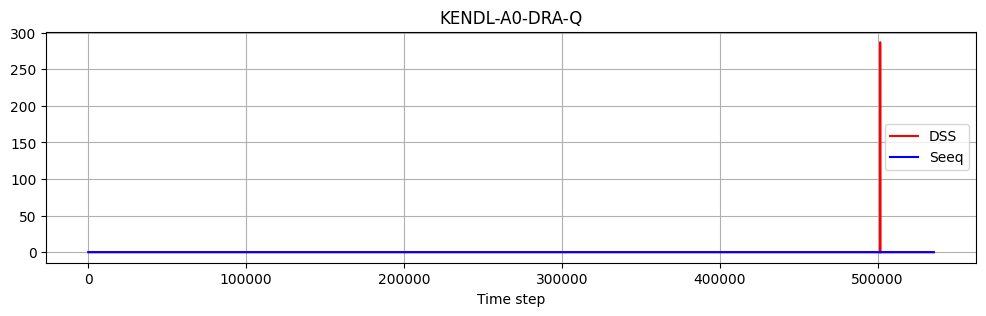

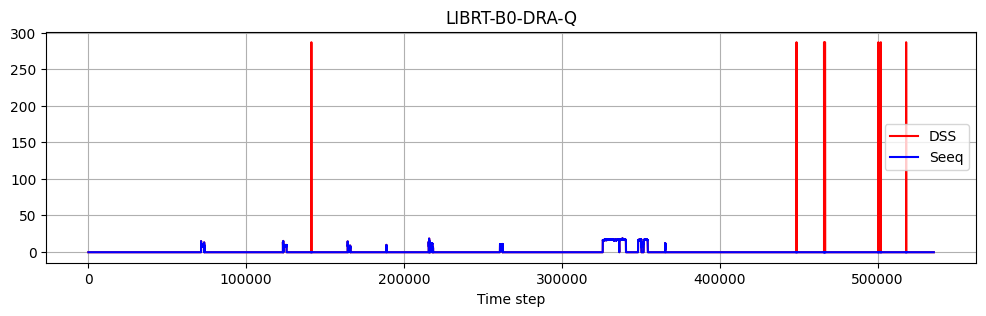

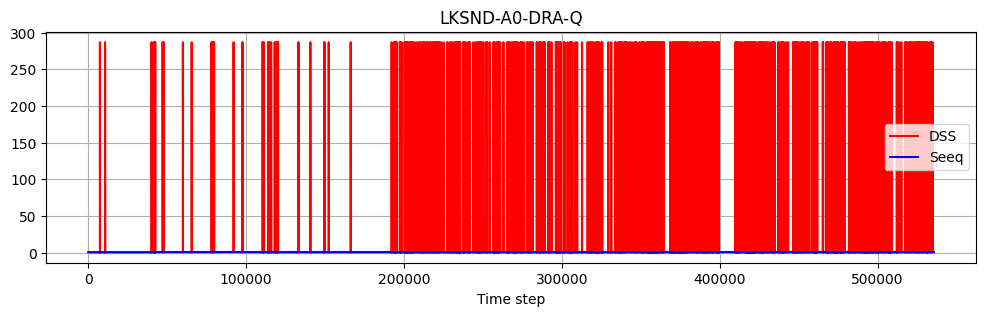

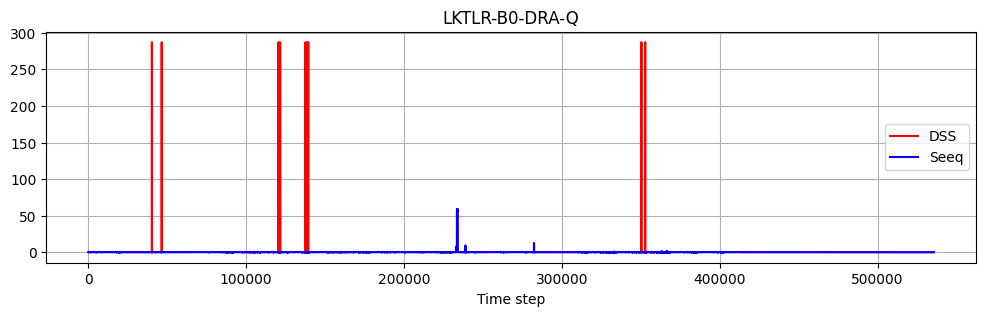

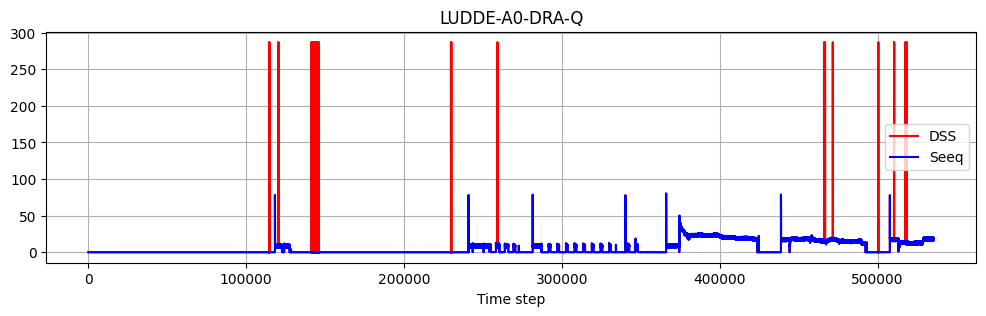

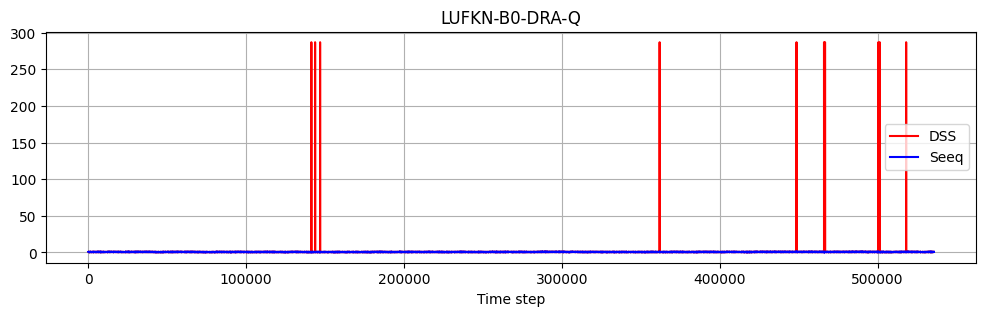

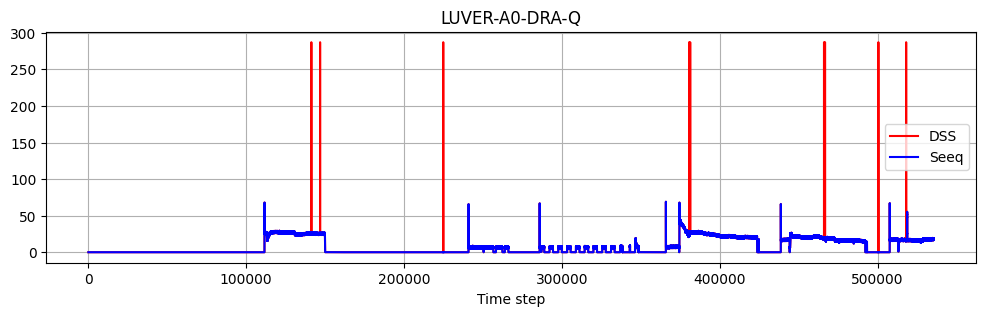

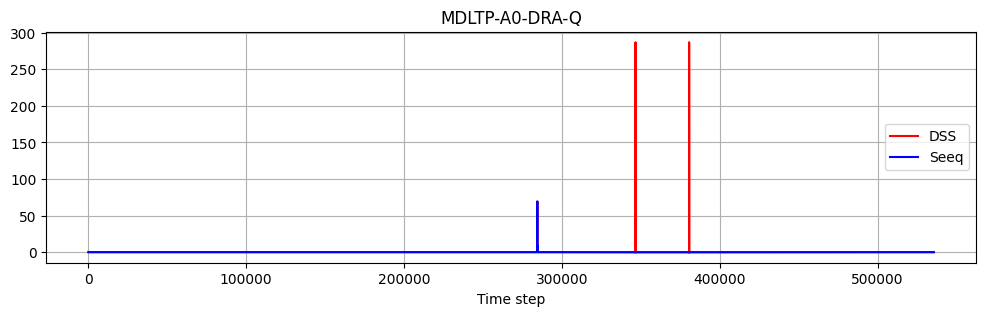

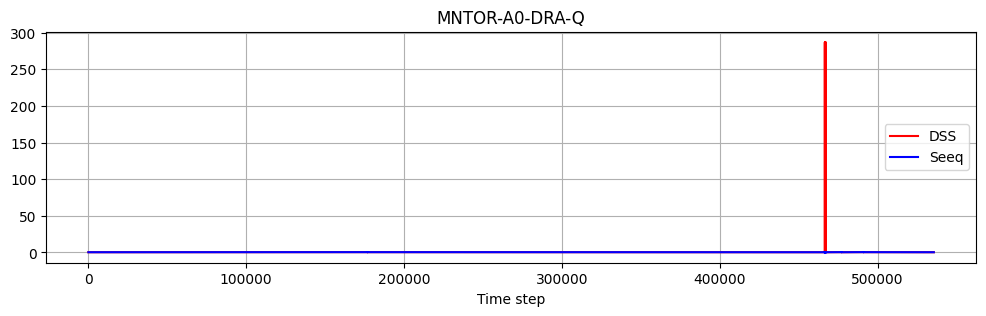

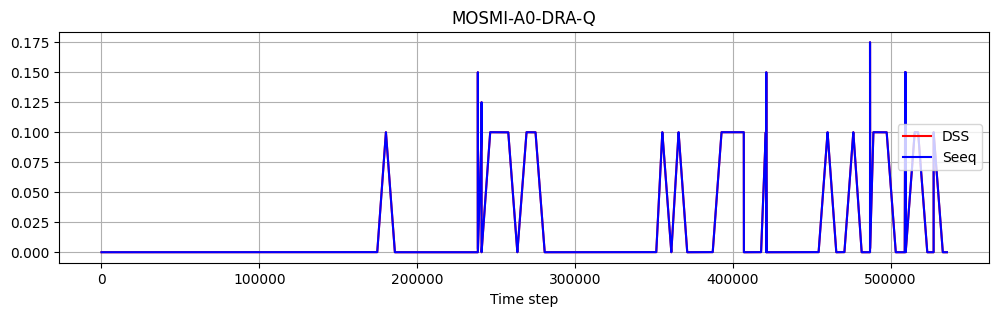

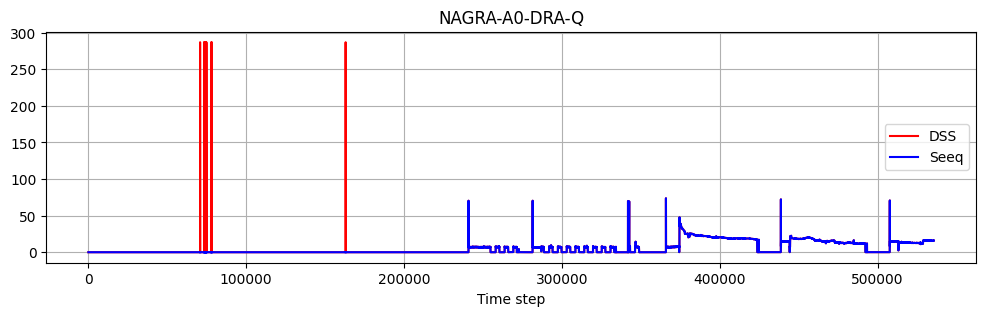

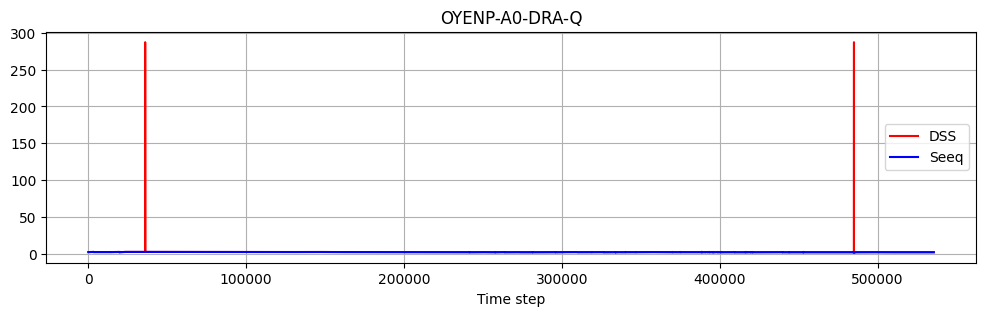

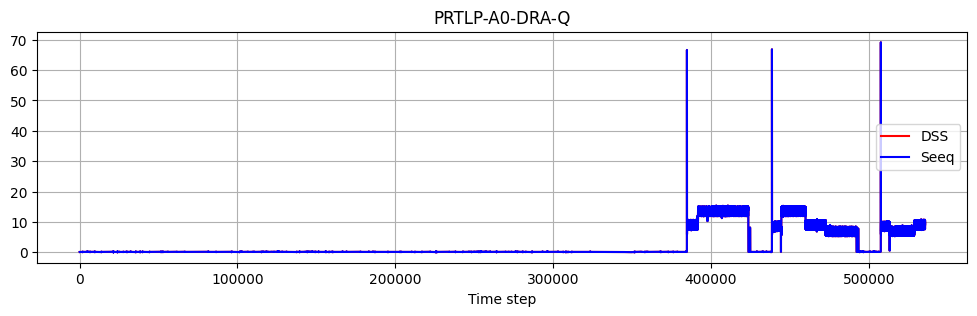

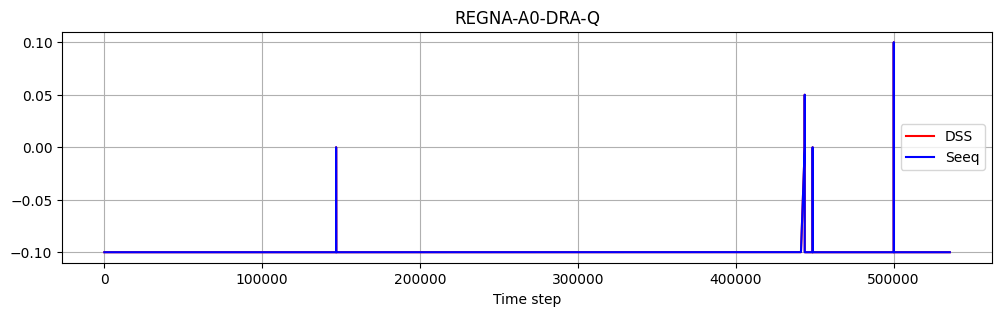

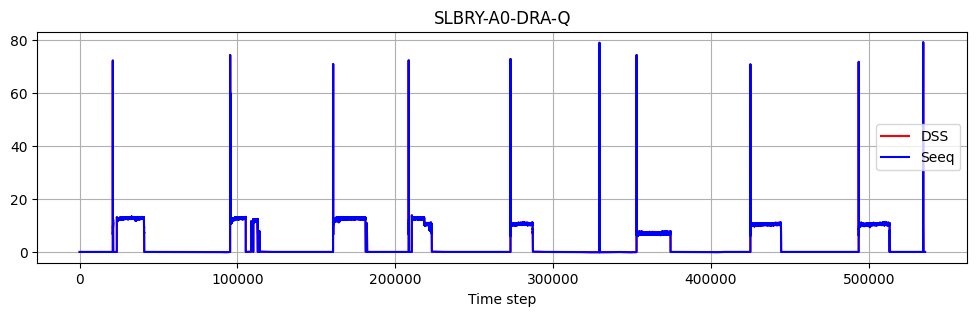

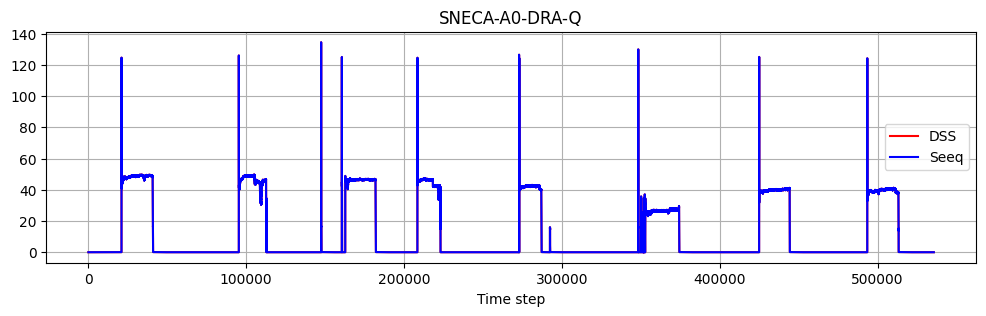

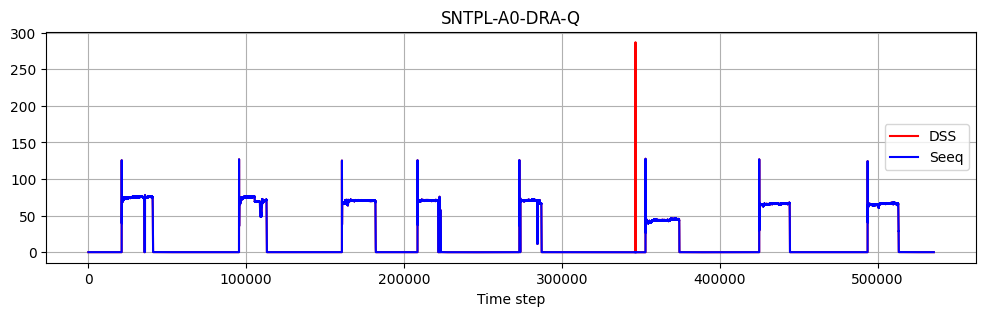

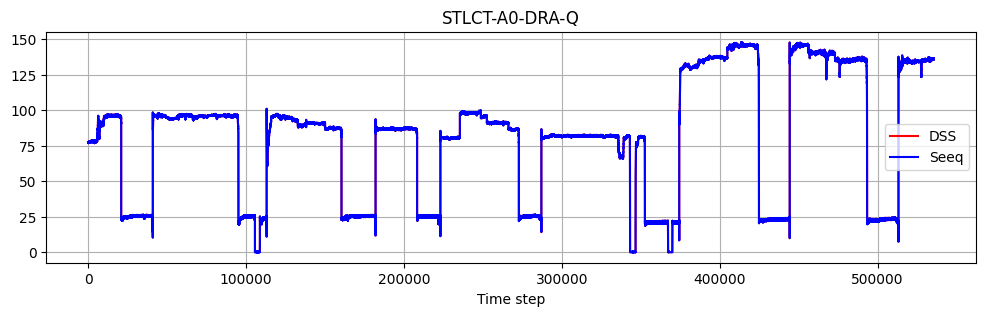

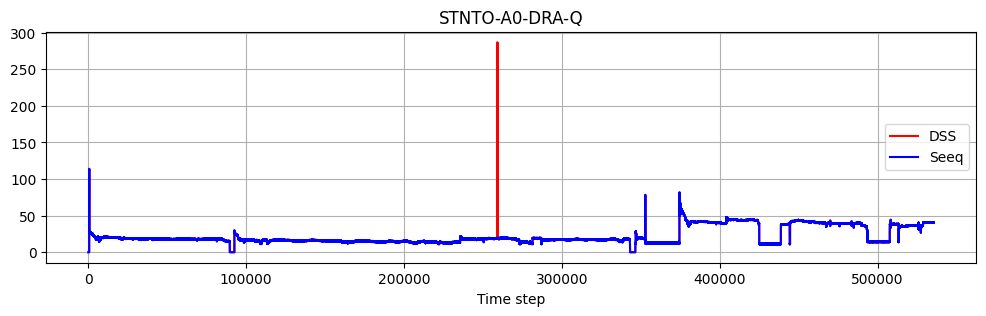

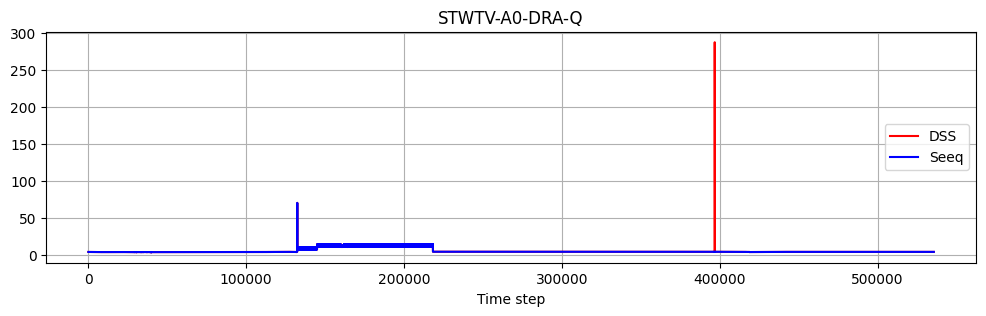

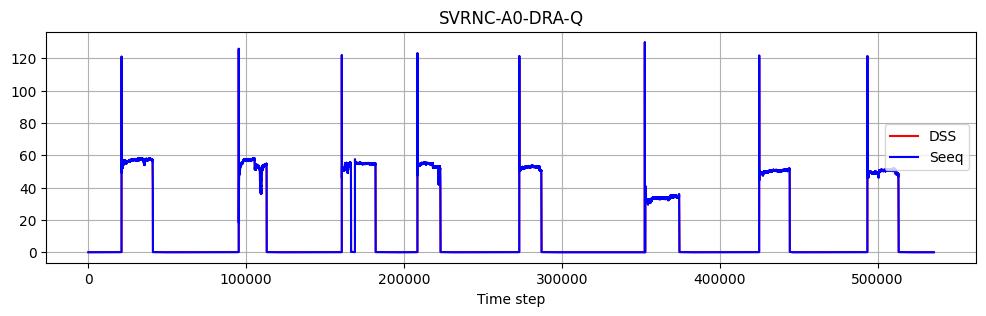

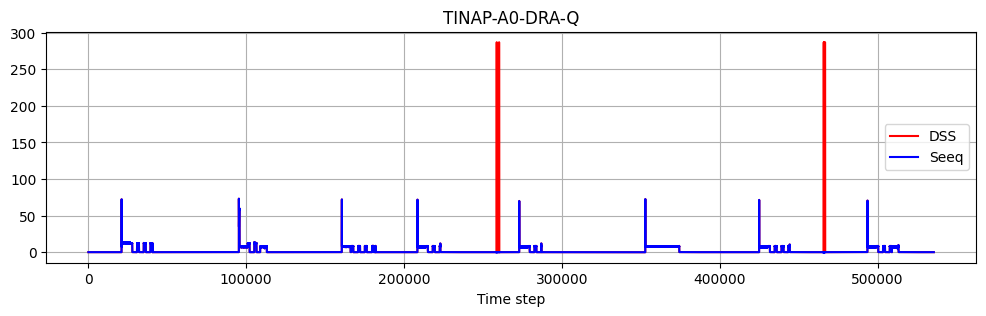

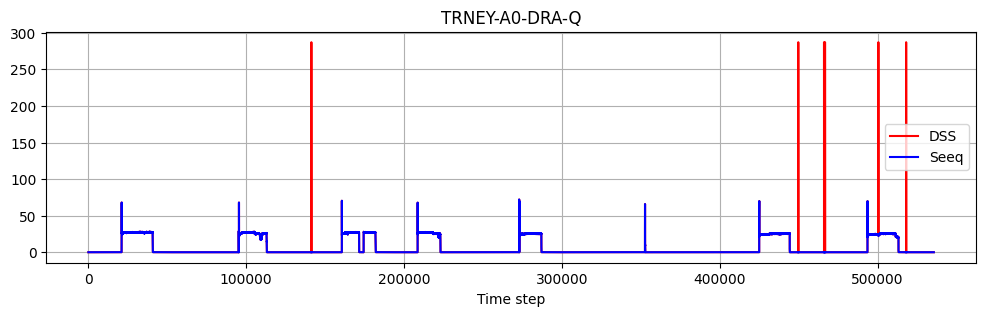

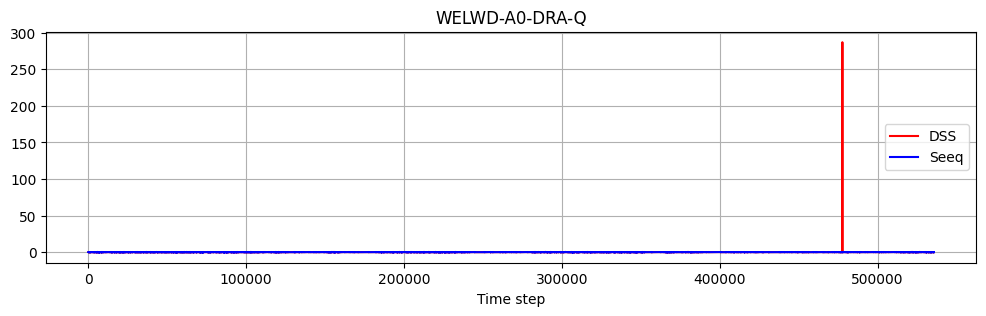

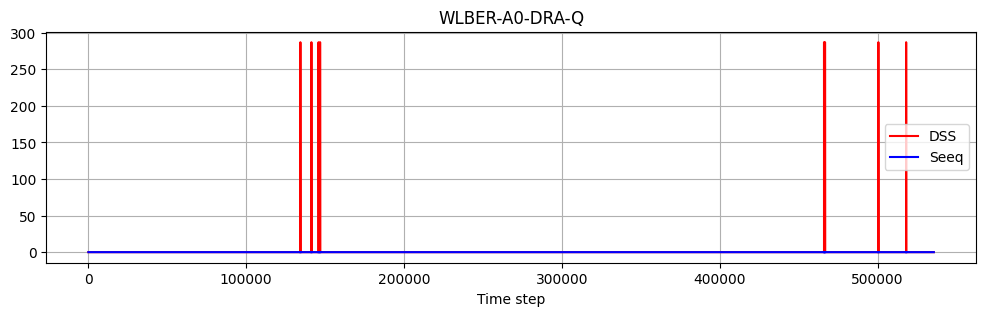

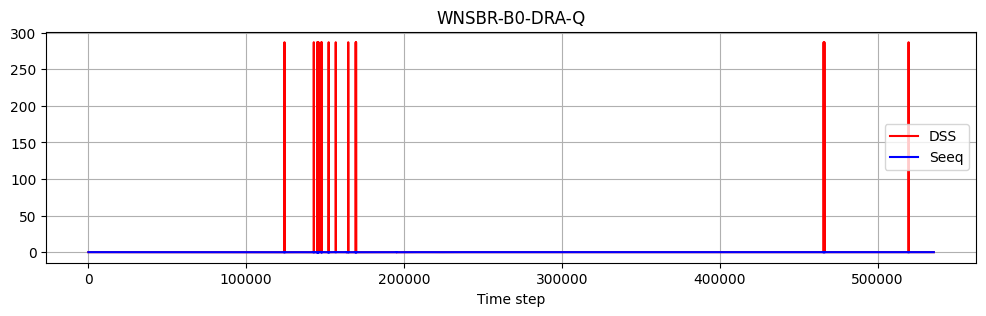

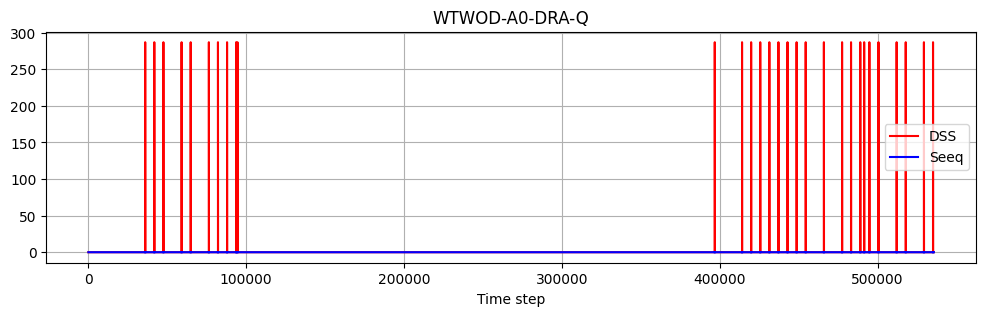

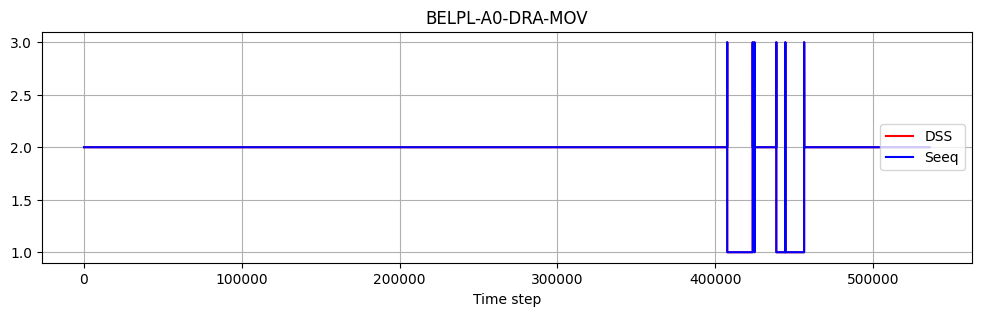

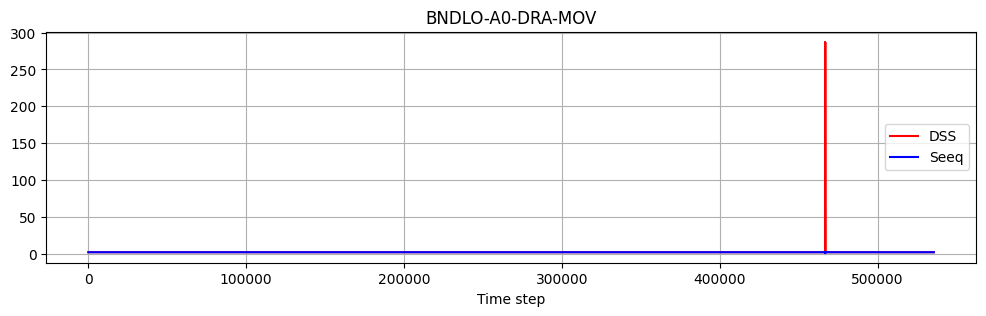

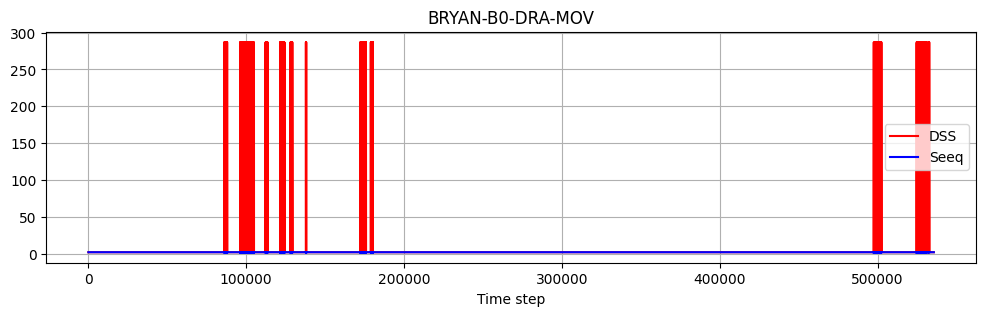

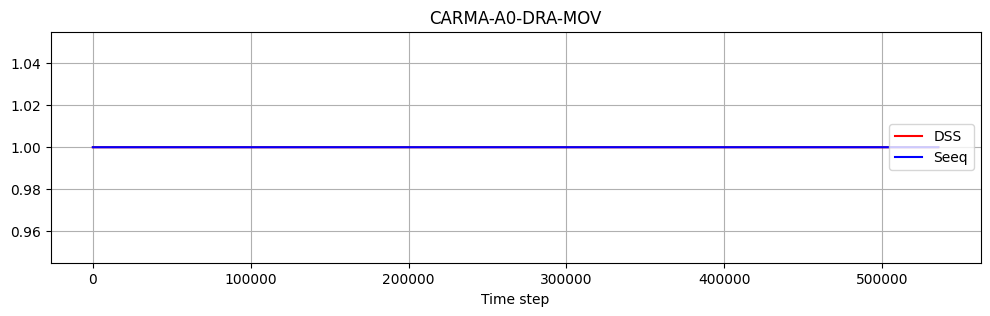

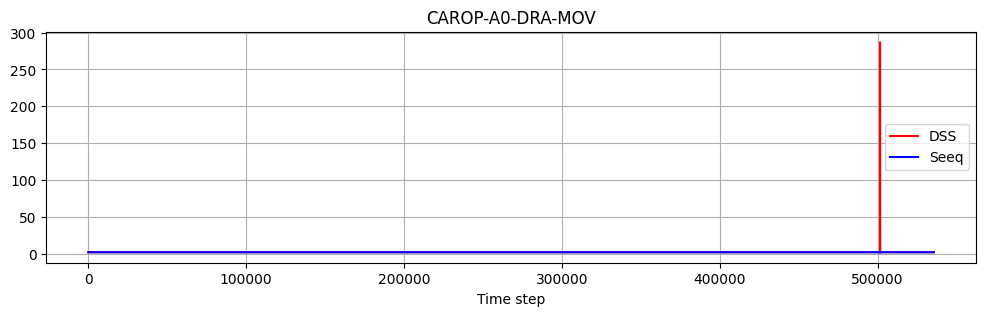

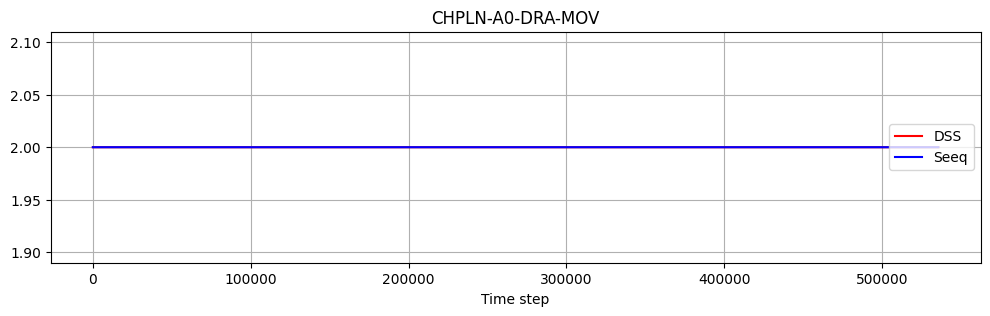

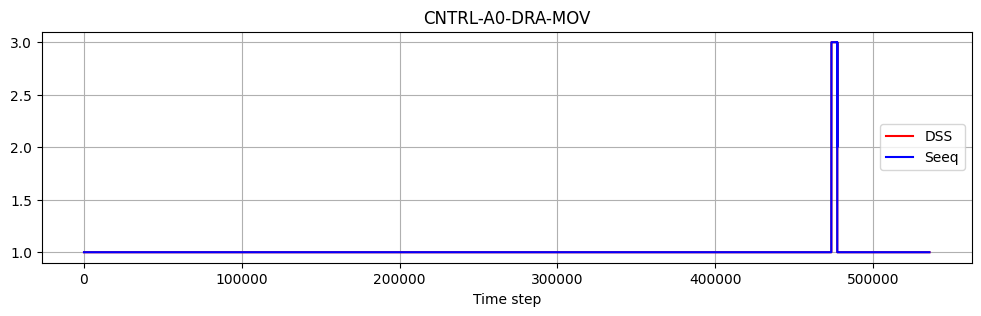

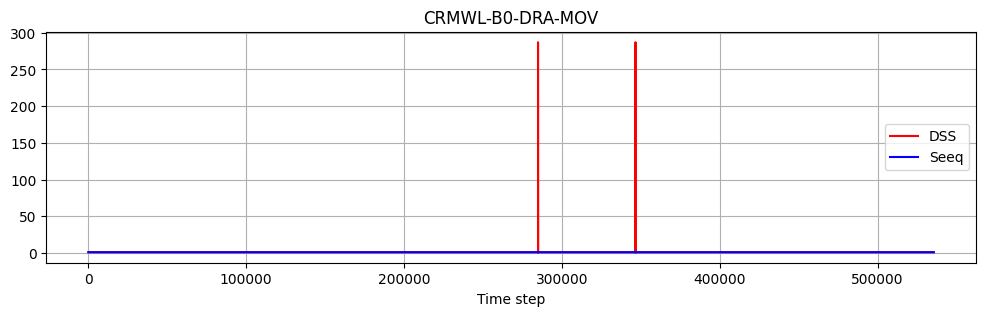

IndexError: list index out of range

In [16]:
# Create the plot
for n in range(100):
    tag = list(data_DSS.keys())[n]
    plt.figure(figsize=(12, 3))  # Set figure size
    plt.plot(data_DSS[tag]['Value'].values,'r', label='DSS')
    plt.plot(data_Seeq[tag]['values'].values,'b', label='Seeq')
    plt.xlabel('Time step')
    plt.title(tag)
    plt.grid(True)
    plt.legend(loc='right')
    # Show the plot
    plt.show()

# Assessing speed

In [9]:
elapsed_times_DSS = []

# Read the file
with open('DSS_API_test_log.txt', 'r') as file:
    for line in file:
        # Check for lines starting with "Elapsed time:"
        if line.startswith('Elapsed time:'):
            # Split the line by whitespace and get the float value
            parts = line.split()
            elapsed_time = float(parts[2])  # "8.836" -> 8.836
            elapsed_times_DSS.append(elapsed_time)

In [11]:
elapsed_times_Seeq_1 = []

# Read the file
with open('Seeq_API_test_log_1.txt', 'r') as file:
    for line in file:
        # Check for lines starting with "Elapsed time:"
        if line.startswith('Elapsed time:'):
            # Split the line by whitespace and get the float value
            parts = line.split()
            elapsed_time = float(parts[2])  # "8.836" -> 8.836
            elapsed_times_Seeq_1.append(elapsed_time)

In [12]:
elapsed_times_Seeq_2 = []

# Read the file
with open('Seeq_API_test_log_2.txt', 'r') as file:
    for line in file:
        # Check for lines starting with "Elapsed time:"
        if line.startswith('Elapsed time:'):
            # Split the line by whitespace and get the float value
            parts = line.split()
            elapsed_time = float(parts[2])  # "8.836" -> 8.836
            elapsed_times_Seeq_2.append(elapsed_time)

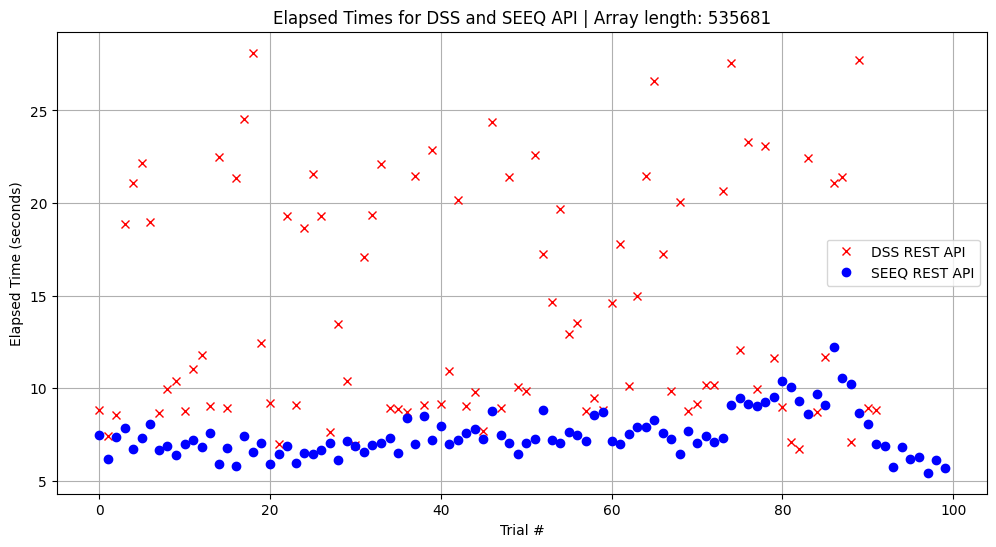

In [13]:
# Create the plot
plt.figure(figsize=(12, 6))  # Set figure size
plt.plot(elapsed_times_DSS,'xr', label='DSS REST API')
plt.plot(elapsed_times_Seeq_1,'ob', label='SEEQ REST API')
plt.xlabel('Trial #')
plt.ylabel('Elapsed Time (seconds)')
plt.title('Elapsed Times for DSS and SEEQ API | Array length: 535681')
plt.grid(True)
plt.legend(loc='right')

# Show the plot
plt.show()

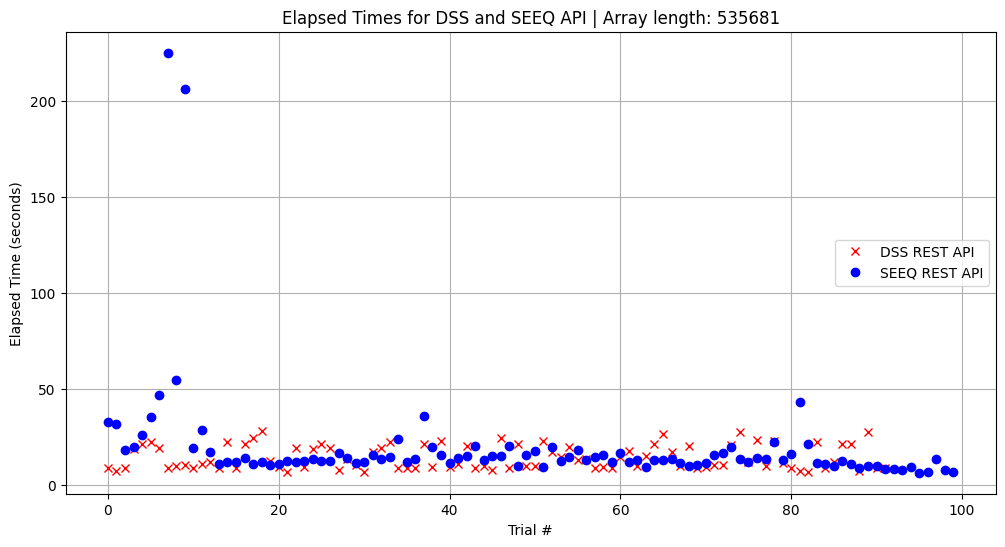

In [15]:
# Create the plot
plt.figure(figsize=(12, 6))  # Set figure size
plt.plot(elapsed_times_DSS,'xr', label='DSS REST API')
plt.plot(elapsed_times_Seeq_2,'ob', label='SEEQ REST API')
plt.xlabel('Trial #')
plt.ylabel('Elapsed Time (seconds)')
plt.title('Elapsed Times for DSS and SEEQ API | Array length: 535681')
plt.grid(True)
plt.legend(loc='right')

# Show the plot
plt.show()